In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# list of LGAs and PHN codes
NWM_LGA = [21180, 21890, 23110, 23270, '24130a', 24330, 24600, 24650,
           25060, '25150a', 25250, 27260, 27350, 'PHN201']

In [5]:
mother_child_raw = pd.read_excel('Data/mother_child_data.xlsx')

MC_col = ['LGA_name', '% low birthweight babies','% smoking during pregnancy', '% Women who did not attend antenatal care within the first 10 weeks']

MC_data = mother_child_raw.filter(items = MC_col)
MC_data = MC_data.rename(columns ={'% Women who did not attend antenatal care within the first 10 weeks':'% non-attendance of antenatal care'})

MC_data

,LGA_name,% low birthweight babies,% smoking during pregnancy,% non-attendance of antenatal care
0,Central and Eastern Sydney,6.257795,2.93866,49.755995
1,Botany Bay (C),7.139316,3.757515,65.681363
2,Burwood (A),7.449088,1.779194,33.730035
3,Canada Bay (A),6.219767,1.511072,41.600074
4,Canterbury-Bankstown (A) - part a,6.958539,5.423377,45.366723
...,...,...,...,...
667,Northern Territory,9.034942,19.641068,37.228715
668,Greater Darwin,7.231588,10.812017,29.759072
669,Rest of Northern Territory,10.950453,31.031823,46.615236
670,NaN,NaN,NaN,NaN


I want to look at low birth weight (LBW) and especially it's risk factors, namely smoking during pregnancy and non-attendance of antenatal care 

In [6]:
MC_rates = MC_data[MC_data['LGA_name'].isin(['North Western Melbourne', 'Victoria', 'AUSTRALIA+'])]
MC_rates = MC_rates.drop([604]) #remove NWM duplicate
MC_rates = MC_rates.rename(columns = {'LGA_name' : 'Percentage'})
MC_rates = MC_rates.T #transpose axis for graphing
MC_rates.columns = MC_rates.iloc[0] #set column titles
MC_rates = MC_rates[1:] #remove duplicate row

MC_rates

Percentage,North Western Melbourne,AUSTRALIA+,Victoria
% low birthweight babies,6.948485,6.624026,6.660473
% smoking during pregnancy,6.752061,9.643224,8.44493
% non-attendance of antenatal care,71.128977,51.435999,56.820922


In [7]:
# color parameters for plots
NWM_colour = 'cyan'
VIC_colour = 'blue'
AUS_colour = 'teal'

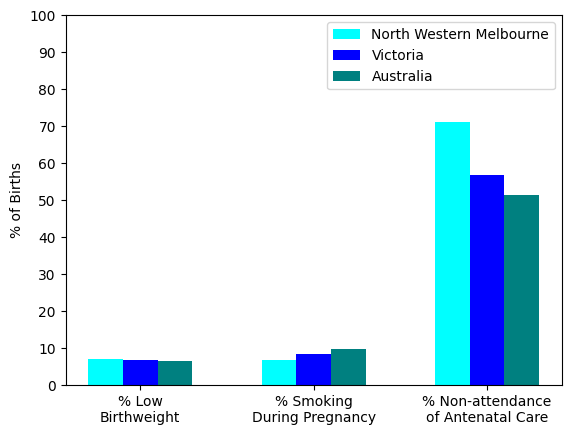

In [8]:
#parsing plot data to list
MC_y1 = MC_rates['North Western Melbourne'].tolist()
MC_y2 = MC_rates['Victoria'].tolist()
MC_y3 = MC_rates['AUSTRALIA+'].tolist()

#plot parameters
MC_x = np.arange(3)
MC_width = 0.2
#drawing plot
plt.bar(MC_x-0.2, MC_y1, MC_width, color = NWM_colour) 
plt.bar(MC_x, MC_y2, MC_width, color = VIC_colour) 
plt.bar(MC_x+0.2, MC_y3, MC_width, color = AUS_colour) 
plt.ylim((0,100))
plt.yticks(np.arange(0,101,10))
plt.xticks(MC_x, ['% Low\nBirthweight','% Smoking\nDuring Pregnancy', '% Non-attendance\nof Antenatal Care']) 
plt.ylabel('% of Births') 
plt.legend(["North Western Melbourne", "Victoria", "Australia"]) 
plt.show() 

In [9]:
MC_LGA = mother_child_raw[mother_child_raw['LGA_code'].isin(NWM_LGA)]
MC_LGA = MC_LGA.drop([604,144])
MC_LGA = MC_LGA.filter(items = ['LGA_name','% Women who did not attend antenatal care within the first 10 weeks'])
MC_LGA = MC_LGA.rename(columns ={'% Women who did not attend antenatal care within the first 10 weeks':'% non-attendance of antenatal care'})

MC_LGA

,LGA_name,% non-attendance of antenatal care
145,Brimbank (C),83.852786
146,Darebin (C),74.394818
147,Hobsons Bay (C),69.00844
148,Hume (C),56.163836
149,Macedon Ranges (S) - part a,64.784513
150,Maribyrnong (C),69.025667
151,Melbourne (C),65.991629
152,Melton (C),80.082124
153,Moonee Valley (C),61.193759
154,Moorabool (S) - part a,60.717514


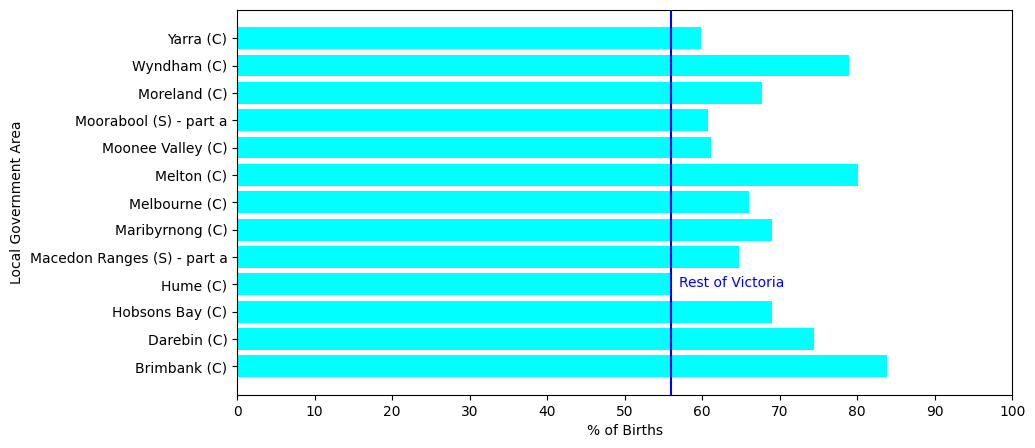

In [10]:
# horizontal bar plot for % non-attendance
fig = plt.figure(figsize=(10,5)) # change figure size
plt.barh(
    MC_LGA['LGA_name'],
    MC_LGA['% non-attendance of antenatal care'],
    color = NWM_colour
    )
plt.xlim(0,100)
plt.xticks(np.arange(0,101,10)) #adjust tick marks
plt.xlabel('% of Births')
plt.ylabel('Local Government Area')
plt.axvline(x=56, color = VIC_colour)
plt.text(57,2.9,'Rest of Victoria', color = VIC_colour)
plt.show()

In [11]:
#family factors
housing_raw = pd.read_excel('Data/housing_data.xlsx')
housing_data = housing_raw[housing_raw['LGA_name'].isin(['North Western Melbourne', 'Victoria','AUSTRALIA+'])]
#crowded homes data
crowded_col = ['LGA_name','% families with children aged less than 15 years living in crowded dwellings','% Single parent families with children living in crowded dwellings, as a proportion of total Single parent families with children']
crowded_data = housing_data.filter(items = crowded_col)
crowded_data.columns = ['LGA_name','% families', '% single parent families']
crowded_data = crowded_data.drop([604])

crowded_data

,LGA_name,% families,% single parent families
144,North Western Melbourne,11.279245,19.787479
627,AUSTRALIA+,8.557538,14.718988
641,Victoria,8.012289,14.33991


outside is percentage owned or renting or other
['Families with children aged less than 15 years living in owned dwellings','Single parent families with children living in owned dwellings',
'Families with children aged less than 15 years living in rented dwellings', 'Single parent families with children living in rented dwellings',
'Families with children aged less than 15 years living in dwellings rented from state or territory housing authority','Single parent families with children living in dwellings rented from state or territory housing authority',
'Families with children aged less than 15 years living in dwellings rented from a housing co-operative, community, or church group','Single parent families with children living in dwellings rented from a housing co-operative, community, or church group',
'Families with children aged less than 15 years living in social housing','Single parent families with children living in social housing',
'Total families with children aged less than 15 years','Total Single parent families with children']

In [12]:
housing_cols = ['Families with children aged less than 15 years living in owned dwellings','Single parent families with children living in owned dwellings',
'Families with children aged less than 15 years living in rented dwellings', 'Single parent families with children living in rented dwellings',
'Families with children aged less than 15 years living in dwellings rented from state or territory housing authority','Single parent families with children living in dwellings rented from state or territory housing authority',
'Families with children aged less than 15 years living in dwellings rented from a housing co-operative, community, or church group','Single parent families with children living in dwellings rented from a housing co-operative, community, or church group',
'Families with children aged less than 15 years living in social housing','Single parent families with children living in social housing']

housing_NWM = housing_raw[housing_raw['LGA_code'] == 'PHN201']
housing_NWM = housing_NWM.drop([604])
housing_NWM = housing_NWM.filter(items = housing_cols)

housing_NWM

,Families with children aged less than 15 years living in owned dwellings,Single parent families with children living in owned dwellings,Families with children aged less than 15 years living in rented dwellings,Single parent families with children living in rented dwellings,Families with children aged less than 15 years living in dwellings rented from state or territory housing authority,Single parent families with children living in dwellings rented from state or territory housing authority,"Families with children aged less than 15 years living in dwellings rented from a housing co-operative, community, or church group","Single parent families with children living in dwellings rented from a housing co-operative, community, or church group",Families with children aged less than 15 years living in social housing,Single parent families with children living in social housing
144,106879,12628,51596,14975,4145,2667,451,263,4596,2930


In [32]:
#single parent families
housing_NWM_1_parent = housing_NWM[housing_NWM.columns[1::2]]

housing_NWM_1_parent.columns = ['Total Owned', 'Total Renting','Renting from housing authority',
                          'Renting from a housing co-operative, community, or church group',
                          'Living in social housing']
housing_NWM_1_parent['Private Renting'] = housing_NWM_1_parent['Total Renting'] - (housing_NWM_1_parent['Renting from a housing co-operative, community, or church group'] + housing_NWM_1_parent['Renting from housing authority'])
housing_NWM_1_parent = housing_NWM_1_parent.drop(columns = ['Total Renting'])
housing_NWM_1_parent = housing_NWM_1_parent.T


housing_NWM_1_parent['Status'] = ['Owned' ,'Rented', 'Rented','Social Housing','Rented']
housing_NWM_1_parent['Housing'] = housing_NWM_1_parent.index

housing_NWM_1_parent = housing_NWM_1_parent.reset_index(drop = True)

housing_NWM_1_parent = housing_NWM_1_parent[['Housing','Status', 144]]

C:\Users\antho\AppData\Local\Temp\ipykernel_29536\1097271087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_NWM_1_parent['Private Renting'] = housing_NWM_1_parent['Total Renting'] - (housing_NWM_1_parent['Renting from a housing co-operative, community, or church group'] + housing_NWM_1_parent['Renting from housing authority'])


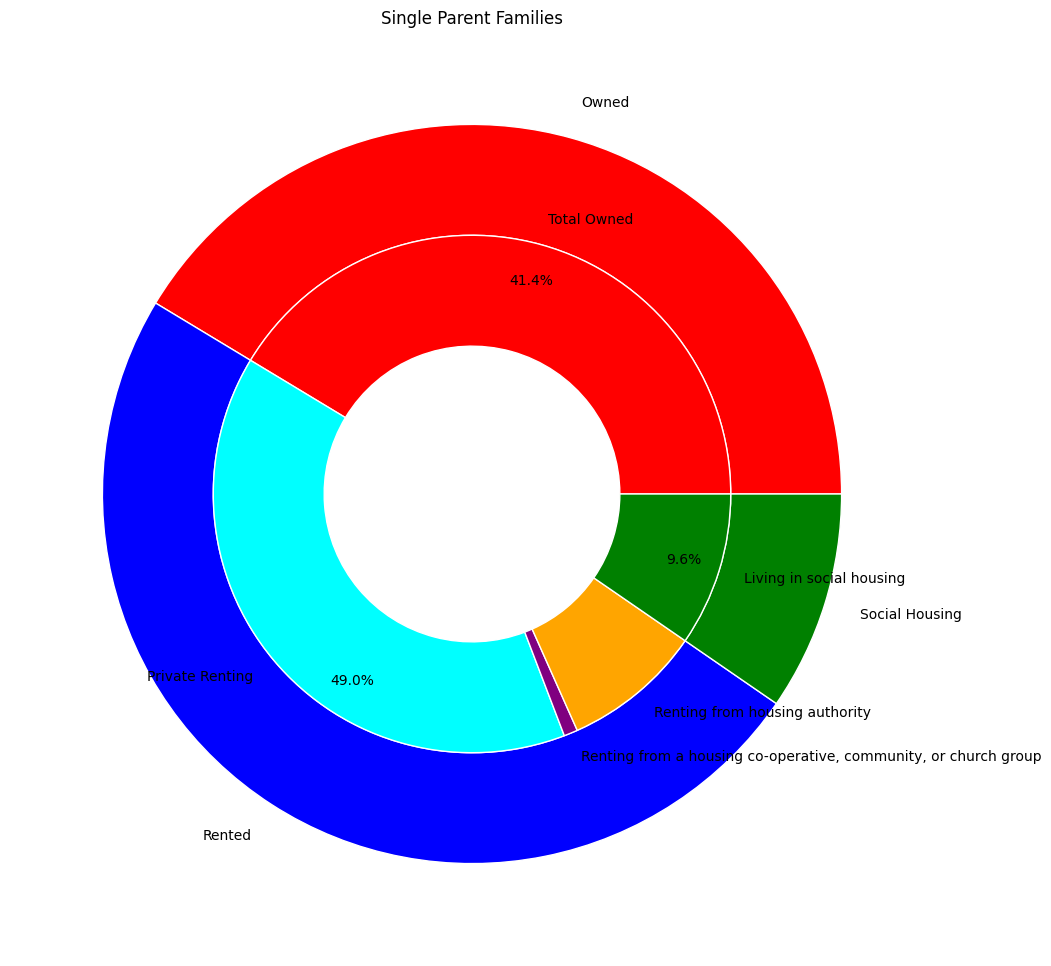

In [52]:
outer1= housing_NWM_1_parent.groupby('Status').sum()
inner1 = housing_NWM_1_parent.groupby(['Status','Housing']).sum()

inner1_labels = inner1.index.get_level_values(1)

fig1, ax1 = plt.subplots(figsize = (24,12))
size1 = 0.3

ax1.pie(outer1.values.flatten()[1::2], radius=1,
       labels=outer1.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size1, edgecolor='w'),
       colors = ['red', 'blue','green'])

ax1.pie(inner1.values.flatten(), radius=1-size1, 
       labels = inner1_labels,
       wedgeprops=dict(width=size1, edgecolor='w'),
       colors = ['red', 'cyan','purple', 'orange','green'])

ax1.set(aspect="equal", title='Pie plot with `ax.pie`')

plt.title('Single Parent Families')
plt.show()

In [35]:
#2 parent families
housing_NWM_2_parent = housing_NWM[housing_NWM.columns[::2]]

housing_NWM_2_parent.columns = ['Total Owned', 'Total Renting','Renting from housing authority',
                          'Renting from a housing co-operative, community, or church group',
                          'Living in social housing']
housing_NWM_2_parent['Private Renting'] = housing_NWM_2_parent['Total Renting'] - (housing_NWM_2_parent['Renting from a housing co-operative, community, or church group'] + housing_NWM_2_parent['Renting from housing authority'])
housing_NWM_2_parent = housing_NWM_2_parent.drop(columns = ['Total Renting'])
housing_NWM_2_parent = housing_NWM_2_parent.T


housing_NWM_2_parent['Status'] = ['Owned' ,'Rented', 'Rented','Social Housing','Rented']
housing_NWM_2_parent['Housing'] = housing_NWM_2_parent.index

housing_NWM_2_parent = housing_NWM_2_parent.reset_index(drop = True)

housing_NWM_2_parent = housing_NWM_2_parent[['Housing','Status', 144]]

C:\Users\antho\AppData\Local\Temp\ipykernel_29536\1204721722.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_NWM_2_parent['Private Renting'] = housing_NWM_2_parent['Total Renting'] - (housing_NWM_2_parent['Renting from a housing co-operative, community, or church group'] + housing_NWM_2_parent['Renting from housing authority'])


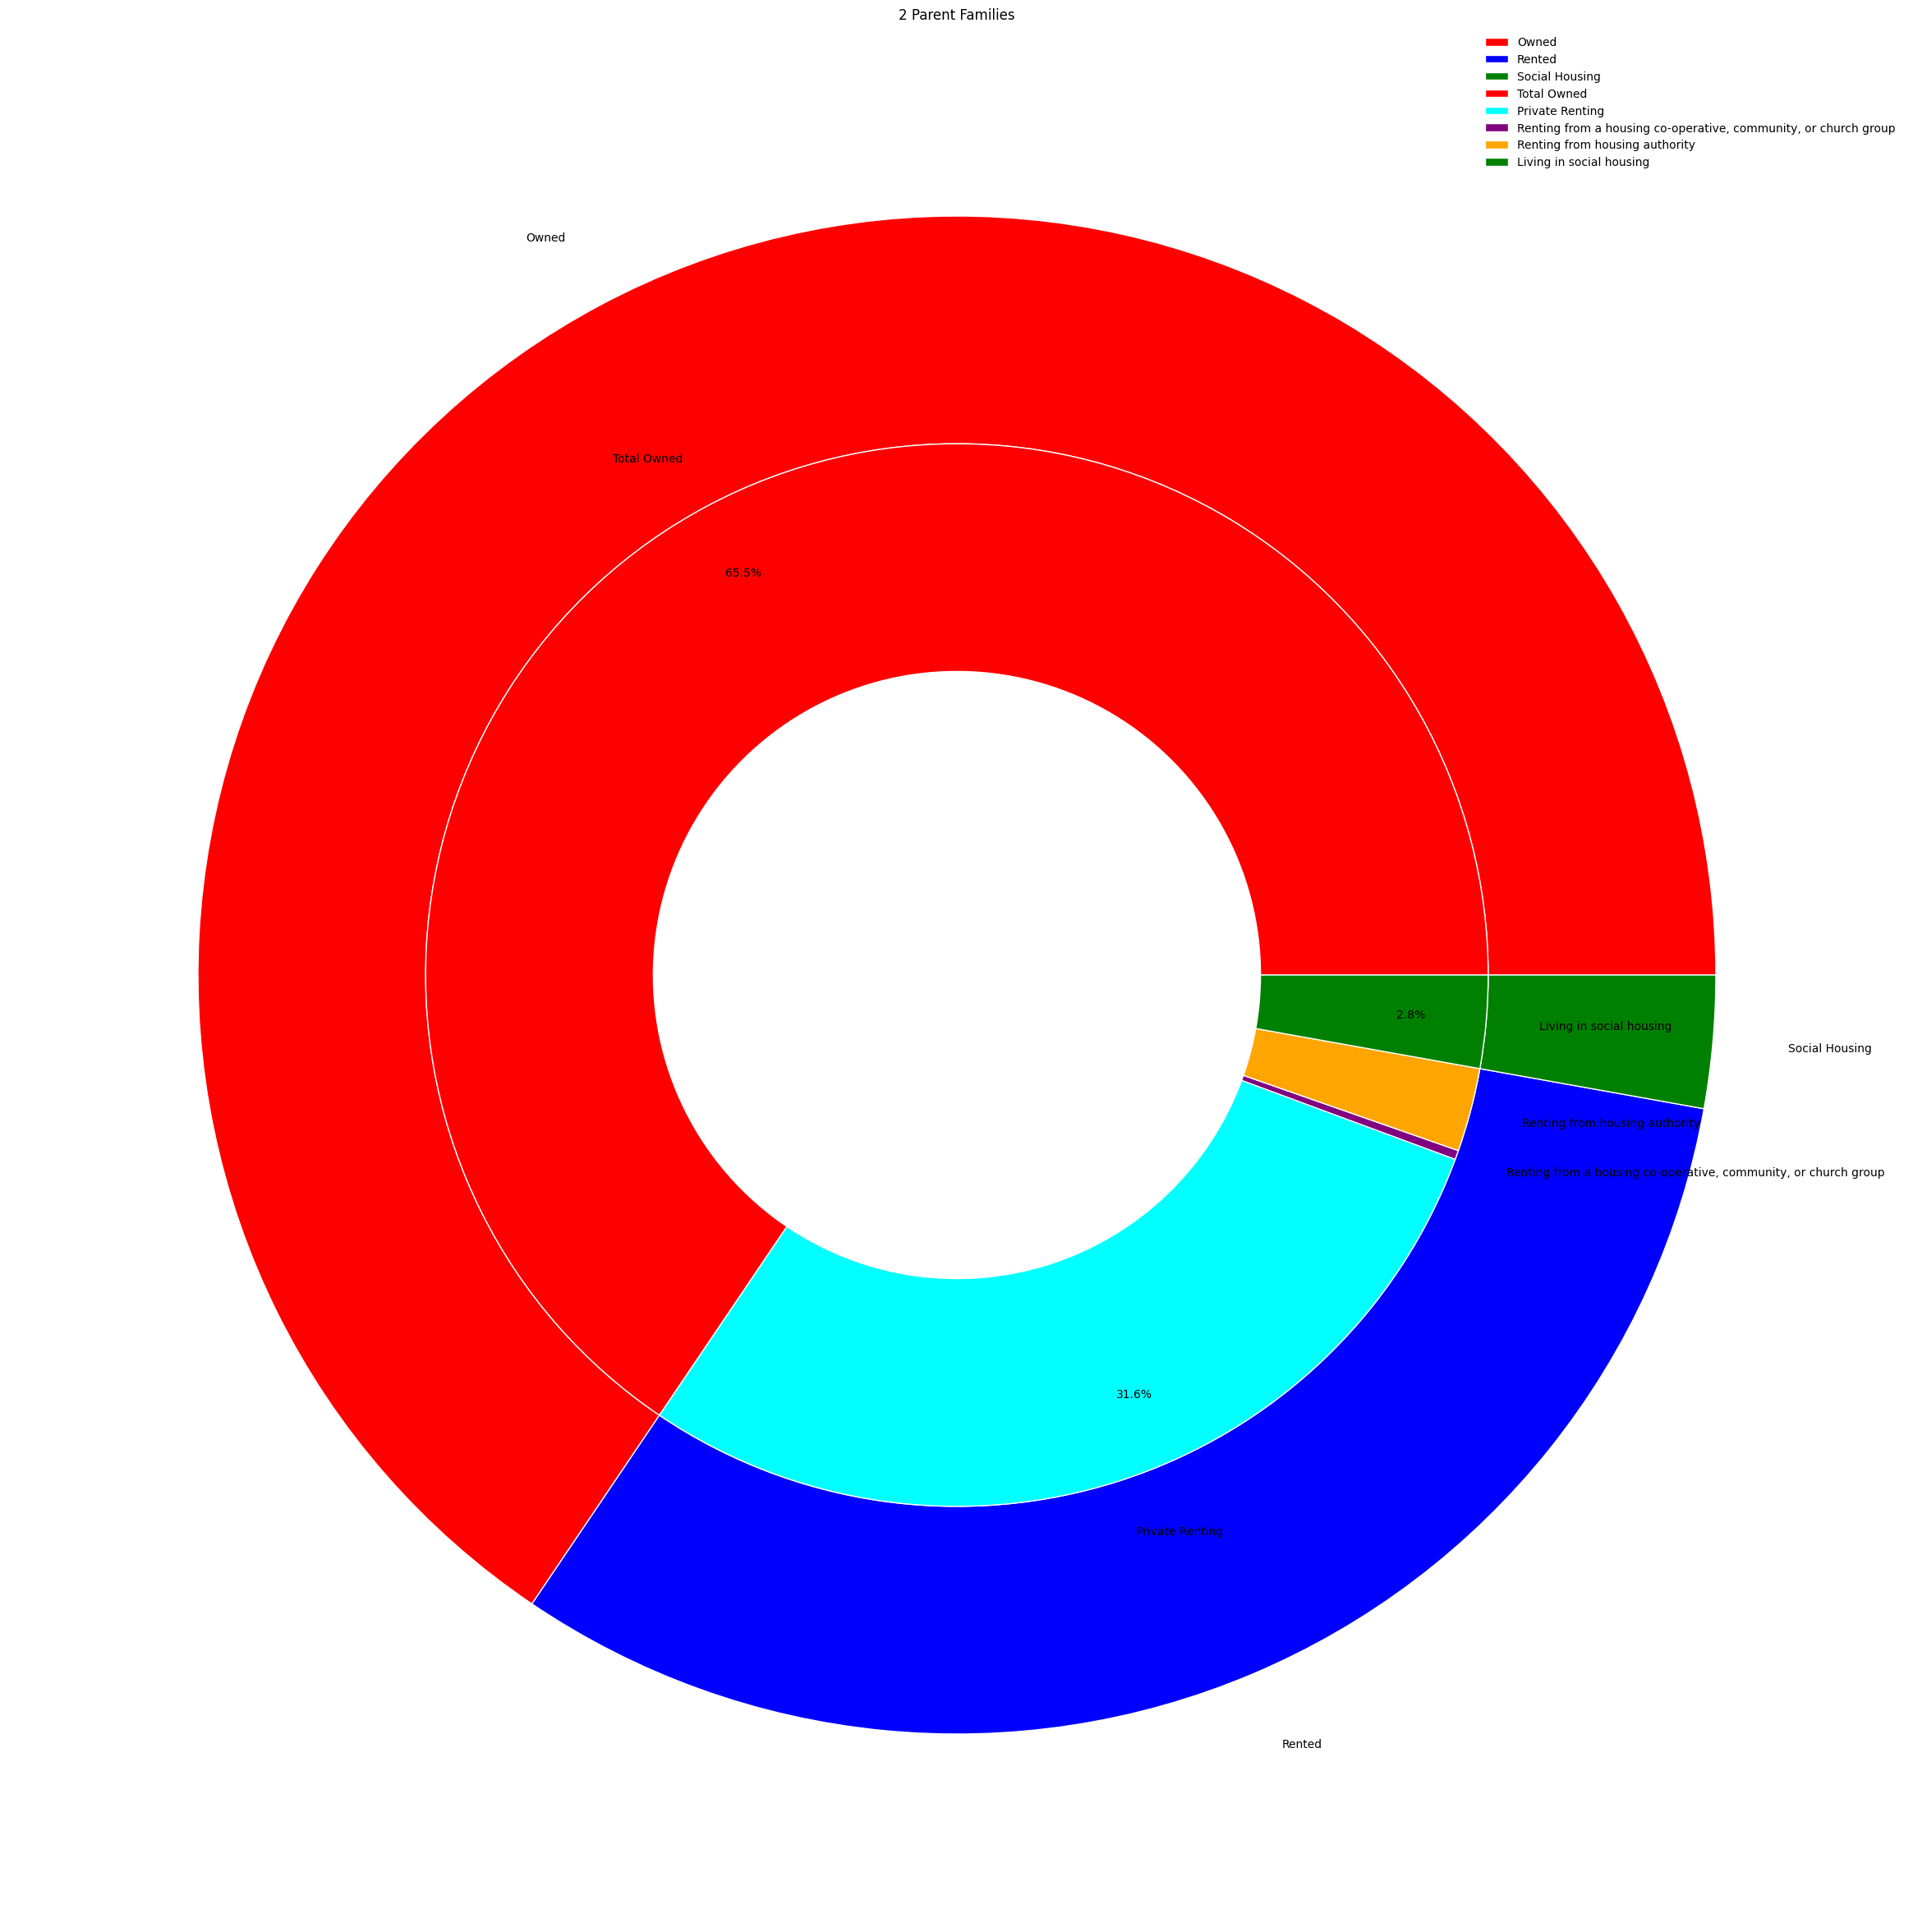

In [51]:
outer2= housing_NWM_2_parent.groupby('Status').sum()
inner2 = housing_NWM_2_parent.groupby(['Status','Housing']).sum()

inner2_labels = inner2.index.get_level_values(1)

fig2, ax2 = plt.subplots(figsize = (40,30))
size2 = 0.3

ax2.pie(outer2.values.flatten()[1::2], radius=1,
       labels=outer2.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size2, edgecolor='w'),
       colors = ['red', 'blue','green'])

ax2.pie(inner2.values.flatten(), radius=1-size2, 
       labels = inner1_labels,
       wedgeprops=dict(width=size2, edgecolor='w'),
       colors = ['red', 'cyan','purple', 'orange','green'])


ax2.set(aspect="equal", title='Pie plot with `ax.pie`')
ax2.legend(edgecolor = 'white')
plt.title('2 Parent Families')
plt.show()

In [57]:
# Family data
family_raw = pd.read_excel('Data/family_data.xlsx')
family_data = family_raw[family_raw['LGA_code'].isin(NWM_LGA)]
family_data = family_data.filter(items= ['LGA_name','Jobless families with children under 15 years','Total families with children under 15 years', '% jobless families'])
family_data = family_data.drop([604])

family_data

,LGA_name,Jobless families with children under 15 years,Total families with children under 15 years,% jobless families
144,North Western Melbourne,20606,161873,12.729811
145,Brimbank (C),3722,19915,18.684739
146,Darebin (C),1451,13386,10.837254
147,Hobsons Bay (C),839,9136,9.18144
148,Hume (C),4170,22804,18.292683
149,Macedon Ranges (S) - part a,168.161623,3106.497159,5.414342
150,Maribyrnong (C),812,7714,10.531777
151,Melbourne (C),724,5331,13.580942
152,Melton (C),2288,17411,13.138099
153,Moonee Valley (C),854,10946,7.799799


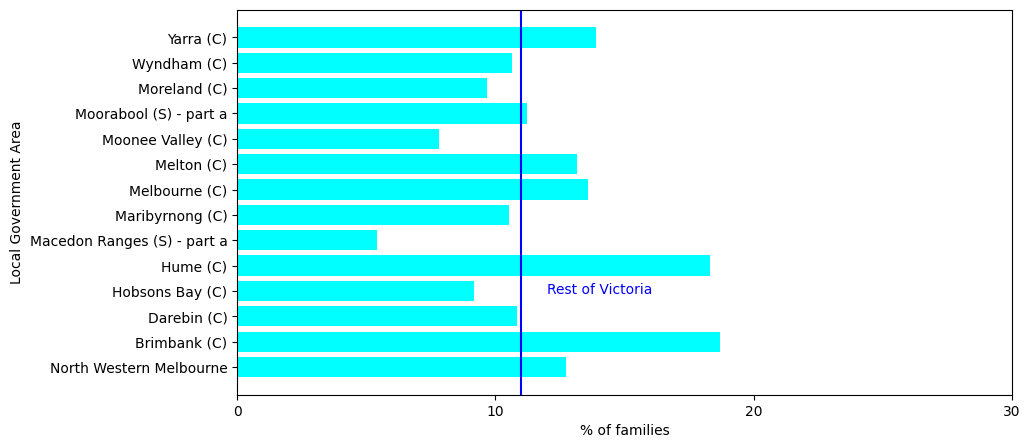

In [63]:
fig3 = plt.figure(figsize=(10,5)) # change figure size
plt.barh(
    family_data['LGA_name'],
    family_data['% jobless families'],
    color = NWM_colour
    )
plt.xlim(0,30)
plt.xticks(np.arange(0,31,10)) #adjust tick marks
plt.xlabel('% of families')
plt.ylabel('Local Government Area')
plt.axvline(x=11, color = VIC_colour)
plt.text(12,2.9,'Rest of Victoria', color = VIC_colour)
plt.show()

In [ ]:
#read data for hospital admissions
hosp_ad_raw = pd.read_excel('Data/hosp_ad_data.xlsx')
hosp_ad = hosp_ad_raw.loc[:, hosp_ad_raw.columns.str.contains('Admissions')] #select for count of admissions 

In [ ]:
# parsing column titles to list format
column_titles = list(hosp_ad.columns)
column_titles = [w.replace("Admissions for " , "") for w in column_titles]

column_titles = [w.replace("\n", "") for w in column_titles]
column_titles = [w.replace("-", "") for w in column_titles]
column_titles = [w.replace("  ", " ") for w in column_titles]
column_titles = [w.replace(", 0 to 14 years Public hospitals" , "") for w in column_titles]
column_titles = [w.replace(", 15 to 24 years Public hospitals" , "") for w in column_titles]

column_titles = column_titles[::2]

# selecting PHN (north western melbourne)
hosp_NWM = hosp_ad.loc[144,:].values.tolist()

# splice data for 0-14 year olds
hosp_0_14 = hosp_NWM[::2] #0-14

#splice data for 15-24 year olds
hosp_15_24 = hosp_NWM[1::2]

d = {
    '0-14': hosp_0_14, 
    '15-24': hosp_15_24
}
hosp_ad_data = pd.DataFrame(data = d)
hosp_ad_data.index = column_titles
hosp_ad_data['Total'] = hosp_ad_data.sum(axis = 1, numeric_only= True)

hosp_ad_0_14_ = hosp_ad_data['0-14'].nlargest(n=10).index.tolist()
hosp_ad_15_24 = hosp_ad_data['15-24'].nlargest(n=10).index.tolist()
hosp_ad_total = hosp_ad_data['Total'].nlargest(n=10).index.tolist()

print(f"0-14: {hosp_ad_0_14_}\n15-24: {hosp_ad_15_24}\ntotal: {hosp_ad_total}")

0-14: ['respiratory system diseases', 'injury, poisoning and other external causes', 'infectious and parasitic diseases', 'nervous system diseases', 'digestive system diseases', 'asthma', 'congenital malformations, deformations and chromosomal abnormalities', 'genitourinary system diseases', 'musculoskeletal system and connective tissue diseases', 'skin and subcutaneous tissue diseases']
15-24: ['injury, poisoning and other external causes', 'digestive system diseases', 'mental health related conditions', 'respiratory system diseases', 'genitourinary system diseases', 'nervous system diseases', 'infectious and parasitic diseases', 'skin and subcutaneous tissue diseases', 'musculoskeletal system and connective tissue diseases', 'endocrine, nutritional and metabolic diseases']
total: ['injury, poisoning and other external causes', 'respiratory system diseases', 'digestive system diseases', 'nervous system diseases', 'infectious and parasitic diseases', 'genitourinary system diseases', 'm

In [ ]:
#read data for emergency room admissions
ED_data_raw = pd.read_excel('Data/ED_data.xlsx')
ED_data = ED_data_raw.loc[:, ED_data_raw.columns.str.contains('Emergency|LGA')]

In [ ]:
# parsing column titles to list format
ED_col_titles = list(ED_data.columns)
ED_col_titles = [w.replace("Emergency department presentations: Total presentations for " , "") for w in ED_col_titles]
ED_col_titles = [w.replace("\n", "") for w in ED_col_titles]
ED_col_titles = [w.replace("-", "") for w in ED_col_titles]
ED_col_titles = [w.replace("  ", " ") for w in ED_col_titles]
ED_col_titles = [w.replace(", 0 to 14 years" , "") for w in ED_col_titles]
ED_col_titles = [w.replace(", 15 to 24 years" , "") for w in ED_col_titles]

ED_col_titles = ED_col_titles[2:]
ED_col_titles = ED_col_titles[::2]

ED_col_titles

ED_data[ED_data['LGA_code'] == 'PHN201'] #index 144

ED_NWM = ED_data.loc[144,:].values.tolist()
ED_NWM = ED_NWM[2:]
# splice data for 0-14 year olds
ED_NWM_0_14 = ED_NWM[::2] #0-14

#splice data for 15-24 year olds
ED_NWM_15_24 = ED_NWM[1::2]

d = {
    '0-14': ED_NWM_0_14, 
    '15-24': ED_NWM_15_24
}
ED_NWM_data = pd.DataFrame(data = d)
ED_NWM_data.index = ED_col_titles
ED_NWM_data['Total'] = ED_NWM_data.sum(axis = 1, numeric_only= True)

ED_0_14_ = ED_NWM_data['0-14'].nlargest(n=10).index.tolist()
ED_15_24 = ED_NWM_data['15-24'].nlargest(n=10).index.tolist()
ED_total = ED_NWM_data['Total'].nlargest(n=10).index.tolist()

print(f"0-14: {ED_0_14_}\n15-24: {ED_15_24}\ntotal: {ED_total}")

0-14: ['injury, poisoning and certain other consequences of external causes', 'diseases of the respiratory system', 'certain infectious and parasitic diseases', 'diseases of the digestive system', 'factors influencing health status and contact with health services', 'diseases of the genitourinary system', 'diseases of the musculoskeletal system and connective tissue', 'mental and behavioural disorders', 'diseases of the circulatory system']
15-24: ['injury, poisoning and certain other consequences of external causes', 'mental and behavioural disorders', 'diseases of the genitourinary system', 'diseases of the digestive system', 'diseases of the respiratory system', 'certain infectious and parasitic diseases', 'factors influencing health status and contact with health services', 'diseases of the musculoskeletal system and connective tissue', 'diseases of the circulatory system']
total: ['injury, poisoning and certain other consequences of external causes', 'diseases of the respiratory s

this shows that mental health disorders are in the top 10 reasons for youth to present to the hospital/ED. and it 2nd most common reason in 15-24 year olds